# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
import pandas as pd

In [2]:
var='TSKIN'

In [3]:
from load_ensembles import *
ensemble_coupled=load_coupled_ensemble(var=var, domain='lnd')
ensemble_offline=load_offline_ensemble(var=var, domain='lnd')

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [4]:
from load_gridcell_areas import *

In [5]:
basecase_lnd_coupled=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+var+'.nc')

In [6]:
basecase_lnd_offline=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+var+'.nc')

In [7]:
print(basecase_lnd_offline.time)
print('--------------------------------')
print(basecase_lnd_coupled.time)

<xarray.DataArray 'time' (time: 1680)>
array([cftime.DatetimeNoLeap(49, 1, 16, 11, 44, 59, 972534, 1, 16),
       cftime.DatetimeNoLeap(49, 2, 15, 0, 0, 0, 0, 3, 46),
       cftime.DatetimeNoLeap(49, 3, 16, 12, 0, 0, 0, 4, 75), ...,
       cftime.DatetimeNoLeap(188, 10, 16, 12, 0, 0, 0, 0, 289),
       cftime.DatetimeNoLeap(188, 11, 16, 0, 0, 0, 0, 3, 320),
       cftime.DatetimeNoLeap(188, 12, 16, 12, 0, 0, 0, 5, 350)], dtype=object)
Coordinates:
  * time     (time) object 0049-01-16 11:44:59 ... 0188-12-16 12:00:00
Attributes:
    long_name:     time
    bounds:        time_bounds
    cell_methods:  time: mean
    NCL:           function time_reassign used to reassign time to mid-value ...
--------------------------------
<xarray.DataArray 'time' (time: 1680)>
array([cftime.DatetimeNoLeap(49, 1, 16, 12, 0, 0, 0, 1, 16),
       cftime.DatetimeNoLeap(49, 2, 15, 0, 0, 0, 0, 3, 46),
       cftime.DatetimeNoLeap(49, 3, 16, 12, 0, 0, 0, 4, 75), ...,
       cftime.DatetimeNoLeap(188, 10, 16

In [8]:
offline_tseries=(basecase_lnd_offline[var]*landweights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')

In [9]:
coupled_tseries=(basecase_lnd_coupled[var]*landweights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')

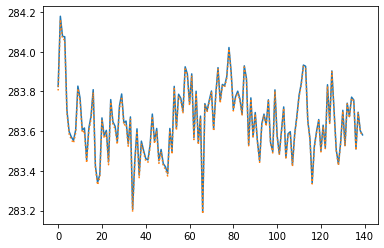

In [10]:
plt.plot(coupled_tseries)
plt.plot(offline_tseries,':')

In [11]:
ensemble_coupled.append(basecase_lnd_coupled)
ensemble_offline.append(basecase_lnd_offline)
#keys.append('0000')

In [12]:
print(np.shape(ensemble_coupled))
print(np.shape(ensemble_offline))

(37, 3)
(37, 3)


In [13]:
landweights_NHmidlat=subset_landweights(latmax=60, latmin=30)
landweights_NHhighlat=subset_landweights(latmax=95, latmin=45)

landweights_tropics=subset_landweights(latmax=20, latmin=-20)

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [14]:
landweights_10deg=subset_landweights(latmin=30,latmax=40)

In [15]:
global_iav_coupled = []
global_mean_coupled = []
global_coeffvar_coupled = []

for i, ds in enumerate(ensemble_coupled):
    if ds is not None:
        ds_annual_global=calculate_mean(ds[var])
        ds_std=ds_annual_global.std(dim='year').values
        ds_mean=ds_annual_global.mean(dim='year').values
    else:
        ds_std=np.nan
        ds_mean=np.nan
    global_iav_coupled.append(ds_std)
    global_mean_coupled.append(ds_mean)
    global_coeffvar_coupled.append(ds_std/ds_mean)

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3

In [16]:
global_iav_offline = []
global_mean_offline = []
global_coeffvar_offline = []
for i, ds in enumerate(ensemble_offline):
    if ds is not None:
        ds_annual_global=calculate_mean(ds[var])
        ds_std=ds_annual_global.std(dim='year').values
        ds_mean=ds_annual_global.mean(dim='year').values
    else:
        ds_std=np.nan
        ds_mean=np.nan
    global_iav_offline.append(ds_std)
    global_mean_offline.append(ds_mean)
    global_coeffvar_offline.append(ds_std/ds_mean)

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3

# Compare global averages

In [17]:
ds[var].units #gC/m2/s to #kgC/m2/yr

'K'

In [18]:
unitconv=1#86400*365/1000

In [19]:
plot_1to1_line=True

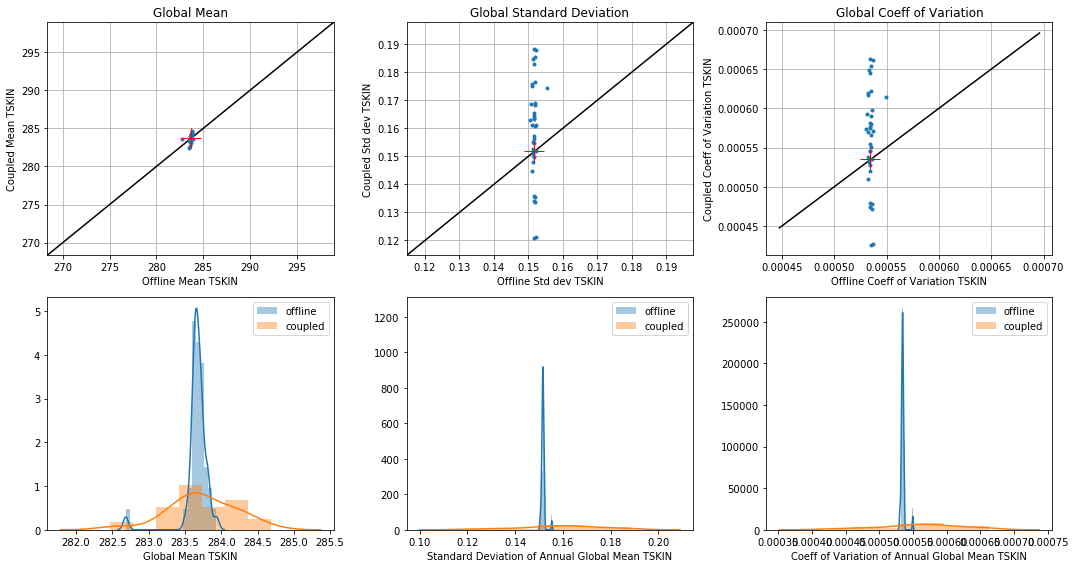

In [20]:


buffer_limits=0.05
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
minval=np.nanmin([np.nanmin(global_mean_offline), np.nanmin(global_mean_coupled)])*unitconv*(1-buffer_limits)
maxval=np.nanmax([np.nanmax(global_mean_offline), np.nanmax(global_mean_coupled)])*unitconv*(1+buffer_limits)
if plot_1to1_line: plt.plot([minval, maxval],[minval, maxval],'-k')
plt.plot(np.array(global_mean_offline)*unitconv, 
         np.array(global_mean_coupled)*unitconv, '.')
plt.plot(np.array(global_mean_coupled)[-1]*unitconv, 
         np.array(global_mean_coupled)[-1]*unitconv, '+r', markersize=20)
plt.grid()
#for i,key in enumerate(keys):
#    plt.text(np.array(global_mean_offline)[i]*unitconv, 
#         np.array(global_mean_coupled)[i]*unitconv,key)
plt.xlabel('Offline Mean '+var)
plt.ylabel('Coupled Mean '+var)
if plot_1to1_line: plt.xlim([minval, maxval])
if plot_1to1_line: plt.ylim([minval, maxval])
plt.title('Global Mean')

plt.subplot(2,3,2)
minval=np.nanmin([np.nanmin(global_iav_offline), np.nanmin(global_iav_coupled)])*unitconv*(1-buffer_limits)
maxval=np.nanmax([np.nanmax(global_iav_offline), np.nanmax(global_iav_coupled)])*unitconv*(1+buffer_limits)
if plot_1to1_line: plt.plot([minval, maxval],[minval, maxval],'-k')
plt.plot(np.array(global_iav_offline)*unitconv, 
         np.array(global_iav_coupled)*unitconv, '.')
plt.plot(np.array(global_iav_offline)[-1]*unitconv, 
         np.array(global_iav_coupled)[-1]*unitconv, '+r', markersize=20)
plt.xlabel('Offline Std dev '+var)
plt.ylabel('Coupled Std dev '+var)
plt.title('Global Standard Deviation')
if plot_1to1_line: plt.xlim([minval, maxval])
if plot_1to1_line: plt.ylim([minval, maxval])
plt.grid()

plt.subplot(2,3,3)
minval=np.nanmin([np.nanmin(global_coeffvar_offline), np.nanmin(global_coeffvar_coupled)])
if minval<1:
    minval=minval*(1+buffer_limits)
else:
    minval=minval*(1-buffer_limits)
maxval=np.nanmax([np.nanmax(global_coeffvar_offline), np.nanmax(global_coeffvar_coupled)])*(1+buffer_limits)
if plot_1to1_line: plt.plot([minval, maxval],[minval, maxval],'-k')
plt.plot(np.array(global_coeffvar_offline)*unitconv, 
         np.array(global_coeffvar_coupled)*unitconv, '.')
plt.plot(np.array(global_coeffvar_offline)[-1]*unitconv, 
         np.array(global_coeffvar_coupled)[-1]*unitconv, '+r', markersize=20)
plt.xlabel('Offline Coeff of Variation '+var)
plt.ylabel('Coupled Coeff of Variation '+var)
plt.title('Global Coeff of Variation')
#if plot_1to1_line: plt.xlim([minval, maxval])
#if plot_1to1_line: plt.ylim([minval, maxval])
plt.grid()

plt.subplot(2,3,4)
sns.distplot(np.array(global_mean_offline)*unitconv, label='offline')
sns.distplot(np.array(global_mean_coupled)[~np.isnan(global_mean_coupled)]*unitconv, label='coupled')
plt.legend()
plt.xlabel('Global Mean '+ var)

plt.subplot(2,3,5)
sns.distplot(np.array(global_iav_offline)*unitconv, label='offline')
sns.distplot(np.array(global_iav_coupled)[~np.isnan(global_mean_coupled)]*unitconv, label='coupled')
plt.legend()
plt.xlabel('Standard Deviation of Annual Global Mean '+ var)

plt.subplot(2,3,6)
sns.distplot(np.array(global_coeffvar_offline)*unitconv, label='offline')
sns.distplot(np.array(global_coeffvar_coupled)*unitconv, label='coupled')
plt.legend()
plt.xlabel('Coeff of Variation of Annual Global Mean '+ var)

plt.tight_layout()
plt.savefig(var+'_global_offline_coupled_comparison.png')

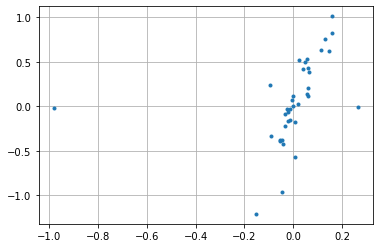

In [21]:
offline_delta = np.array(global_mean_offline)-global_mean_offline[-1]
coupled_delta = np.array(global_mean_coupled)-global_mean_coupled[-1]

#for i, offline in enumerate(offline_delta):
#    plt.plot([offline_delta,offline_delta],
#         [offline_delta,coupled_delta],'-k')#/offline_delta,'.')
plt.plot(offline_delta, coupled_delta,'.')
#plt.plot([-4,5],[-4,5],'-k')
#plt.plot([-4,5],[-2,2.5],'--k')
#plt.plot([-6,4],[-12,8],'--k')
plt.grid()

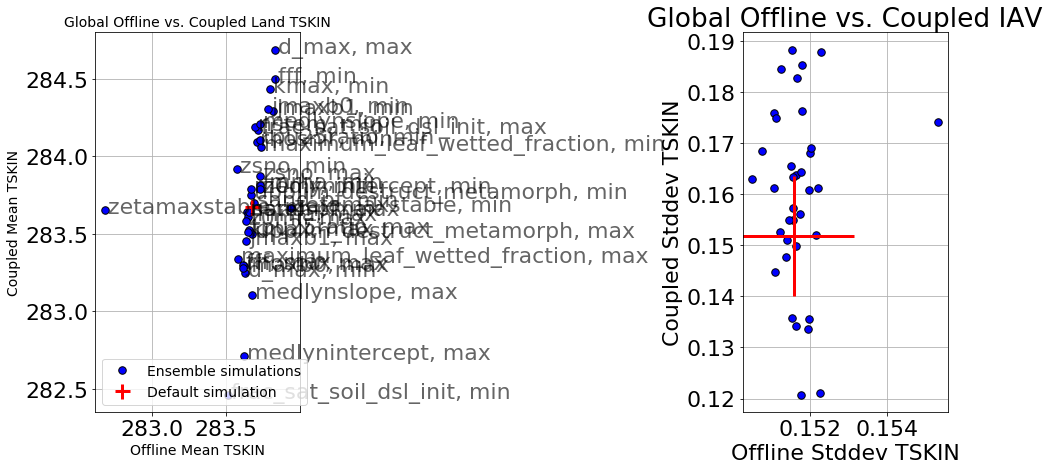

In [27]:
unitconv=1#*365#/1000
plt_text=True
plot_1to1_line=False
buffer_limits=0.01
plt.rcParams.update({'font.size': 22})


plt.figure(figsize=(14,7))
plt.subplot(1,2,1)

minval=np.nanmin([np.nanmin(global_mean_offline), np.nanmin(global_mean_coupled)])*unitconv*(1-buffer_limits)
maxval=np.nanmax([np.nanmax(global_mean_offline), np.nanmax(global_mean_coupled)])*unitconv*(1+buffer_limits)
if plot_1to1_line:
    plt.plot([minval, maxval],[minval, maxval],'-k', label='1:1 line')
    plt.xlim([minval, maxval])
    plt.ylim([minval, maxval])

plt.plot(np.array(global_mean_offline)[:-1]*unitconv, 
         np.array(global_mean_coupled)[:-1]*unitconv, '.')

# Annotate
for i,key in enumerate(keys):
    label=crosswalk.description.values[i]
    if plt_text: plt.annotate(label,
             (global_mean_offline[i]*unitconv+0.02,
              global_mean_coupled[i]*unitconv-0.02),alpha=0.6)
    
plt.plot(np.array(global_mean_offline)[:-1]*unitconv,
         np.array(global_mean_coupled)[:-1]*unitconv, '.b', markersize=15,        markeredgecolor='k',
        label='Ensemble simulations')
plt.plot(np.array(global_mean_coupled)[-1]*unitconv, 
         np.array(global_mean_coupled)[-1]*unitconv, '+r', markeredgewidth=3, markersize=15,
        label='Default simulation')
plt.legend(fontsize=14)

# Format subplot
plt.grid()
plt.xlabel('Offline Mean '+var, fontsize=14)
plt.ylabel('Coupled Mean '+var, fontsize=14)
plt.title('Global Offline vs. Coupled Land '+var, fontsize=14)

plt.subplot(1,2,2)

outlier_filter=(keys!='nan')#(keys!='0012')&(keys!='0011')

minval=np.nanmin([np.nanmin(global_iav_offline), np.nanmin(global_iav_coupled)])*unitconv*(1-buffer_limits)
maxval=np.nanmax([np.nanmax(global_iav_offline), np.nanmax(global_iav_coupled)])*unitconv*(1+buffer_limits)
if plot_1to1_line: plt.plot([minval, maxval],[minval, maxval],'-k')

plt.plot(np.array(global_iav_offline)[:-1][outlier_filter]*unitconv, 
         np.array(global_iav_coupled)[:-1][outlier_filter]*unitconv, '.')

# Annotate
for i,key in enumerate(keys):
    label=crosswalk.description.values[i]
    if outlier_filter[i]==True:
        testind=1
#        plt.text(global_iav_offline[i]*unitconv+0.001,
#                  global_iav_coupled[i]*unitconv-0.001, label,
#                 alpha=0.6)

plt.plot(np.array(global_iav_offline)[:-1][outlier_filter]*unitconv, 
         np.array(global_iav_coupled)[:-1][outlier_filter]*unitconv, 'b.', markersize=15,
        markeredgecolor='k')

plt.plot(np.array(global_iav_offline)[-1]*unitconv, 
         np.array(global_iav_coupled)[-1]*unitconv, '+r', markeredgewidth=3,markersize=120)

# Format subplot
plt.grid()
plt.xlabel('Offline Stddev '+var)
plt.ylabel('Coupled Stddev '+var)
plt.title('Global Offline vs. Coupled IAV')


plt.tight_layout()
plt.savefig(var+'_scatterplots.png')

0.4499999999999993
2.5


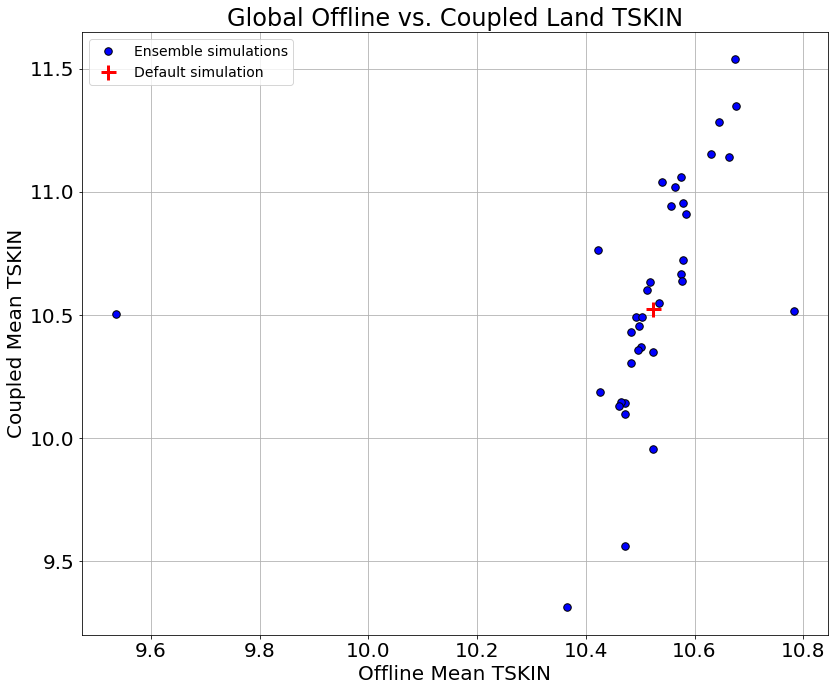

In [31]:
unitconv=1#*365#/1000
plt_text=False
plot_1to1_line=False
buffer_limits=0.001
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(12,10))

outlier_filter=(keys!='nan')#(keys!='0012')&(keys!='0011')

minval=np.nanmin([np.nanmin(global_mean_offline), np.nanmin(global_mean_coupled)])*unitconv*(1-buffer_limits)
maxval=np.nanmax([np.nanmax(global_mean_offline), np.nanmax(global_mean_coupled)])*unitconv*(1+buffer_limits)
if plot_1to1_line:
    plt.plot([minval, maxval],[minval, maxval],'-k', label='1:1 line')
    plt.xlim([minval, maxval])
    plt.ylim([minval, maxval])

plt.plot(np.array(global_mean_offline)[:-1]-273.15,  #[outlier_filter]
         np.array(global_mean_coupled)[:-1]-273.15, '.')

# Annotate
for i,key in enumerate(keys[outlier_filter]):
    label=crosswalk.description.values[i]
    if plt_text: 
        if np.abs(global_mean_coupled[i]-273.15-10.5)>0.5: plt.annotate(label,
             (global_mean_offline[i]-273.15+0.005,
              global_mean_coupled[i]-273.15-0.02),alpha=0.6,fontsize=15)
        elif np.abs(global_mean_offline[i]-273.15-10.53)>0.1: plt.annotate(label,
             (global_mean_offline[i]-273.15+0.005,
              global_mean_coupled[i]-273.15-0.02),alpha=0.6,fontsize=15)
    
plt.plot(np.array(global_mean_offline)[:-1]-273.15,
         np.array(global_mean_coupled)[:-1]-273.15, '.b', markersize=15,        markeredgecolor='k',
        label='Ensemble simulations')
plt.plot(np.array(global_mean_coupled)[-1]-273.15, 
         np.array(global_mean_coupled)[-1]-273.15, '+r', markeredgewidth=3, markersize=15,
        label='Default simulation')
plt.legend(fontsize=14)

# Format subplot
plt.grid()
plt.xlabel('Offline Mean '+var)#, fontsize=14)
plt.ylabel('Coupled Mean '+var)#, fontsize=14)
plt.title('Global Offline vs. Coupled Land '+var)#, fontsize=14)


#plt.ylim([9.25, 11.75])
#plt.xlim([10.3, 10.75])
print(10.75-10.3)
print(11.75-9.25)
plt.tight_layout()
plt.savefig(var+'_scatterplots.png')

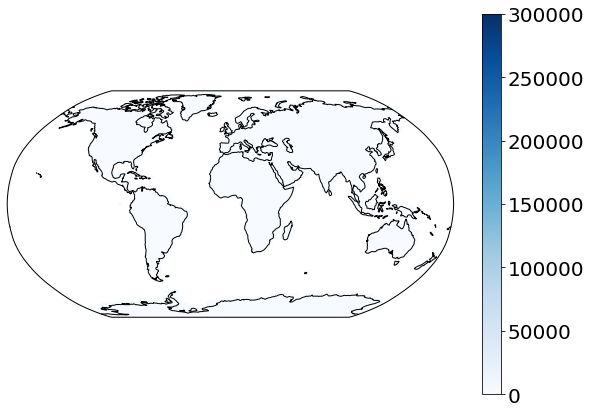

In [25]:
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs

iav_basecase=basecase_lnd_coupled[var].groupby('time.year').mean(dim='time').std(dim='year')*unitconv

mapdata=iav_basecase

plt.figure(figsize=(10,7))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()

cyclic_data, cyclic_lons = add_cyclic_point(mapdata, coord=mapdata.lon)

plt.pcolormesh(cyclic_lons, mapdata.lat, 
               cyclic_data, 
               cmap=plt.cm.Blues, vmin=0, vmax=300000,
               transform=ccrs.PlateCarree())
plt.colorbar()

# Other plots

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3

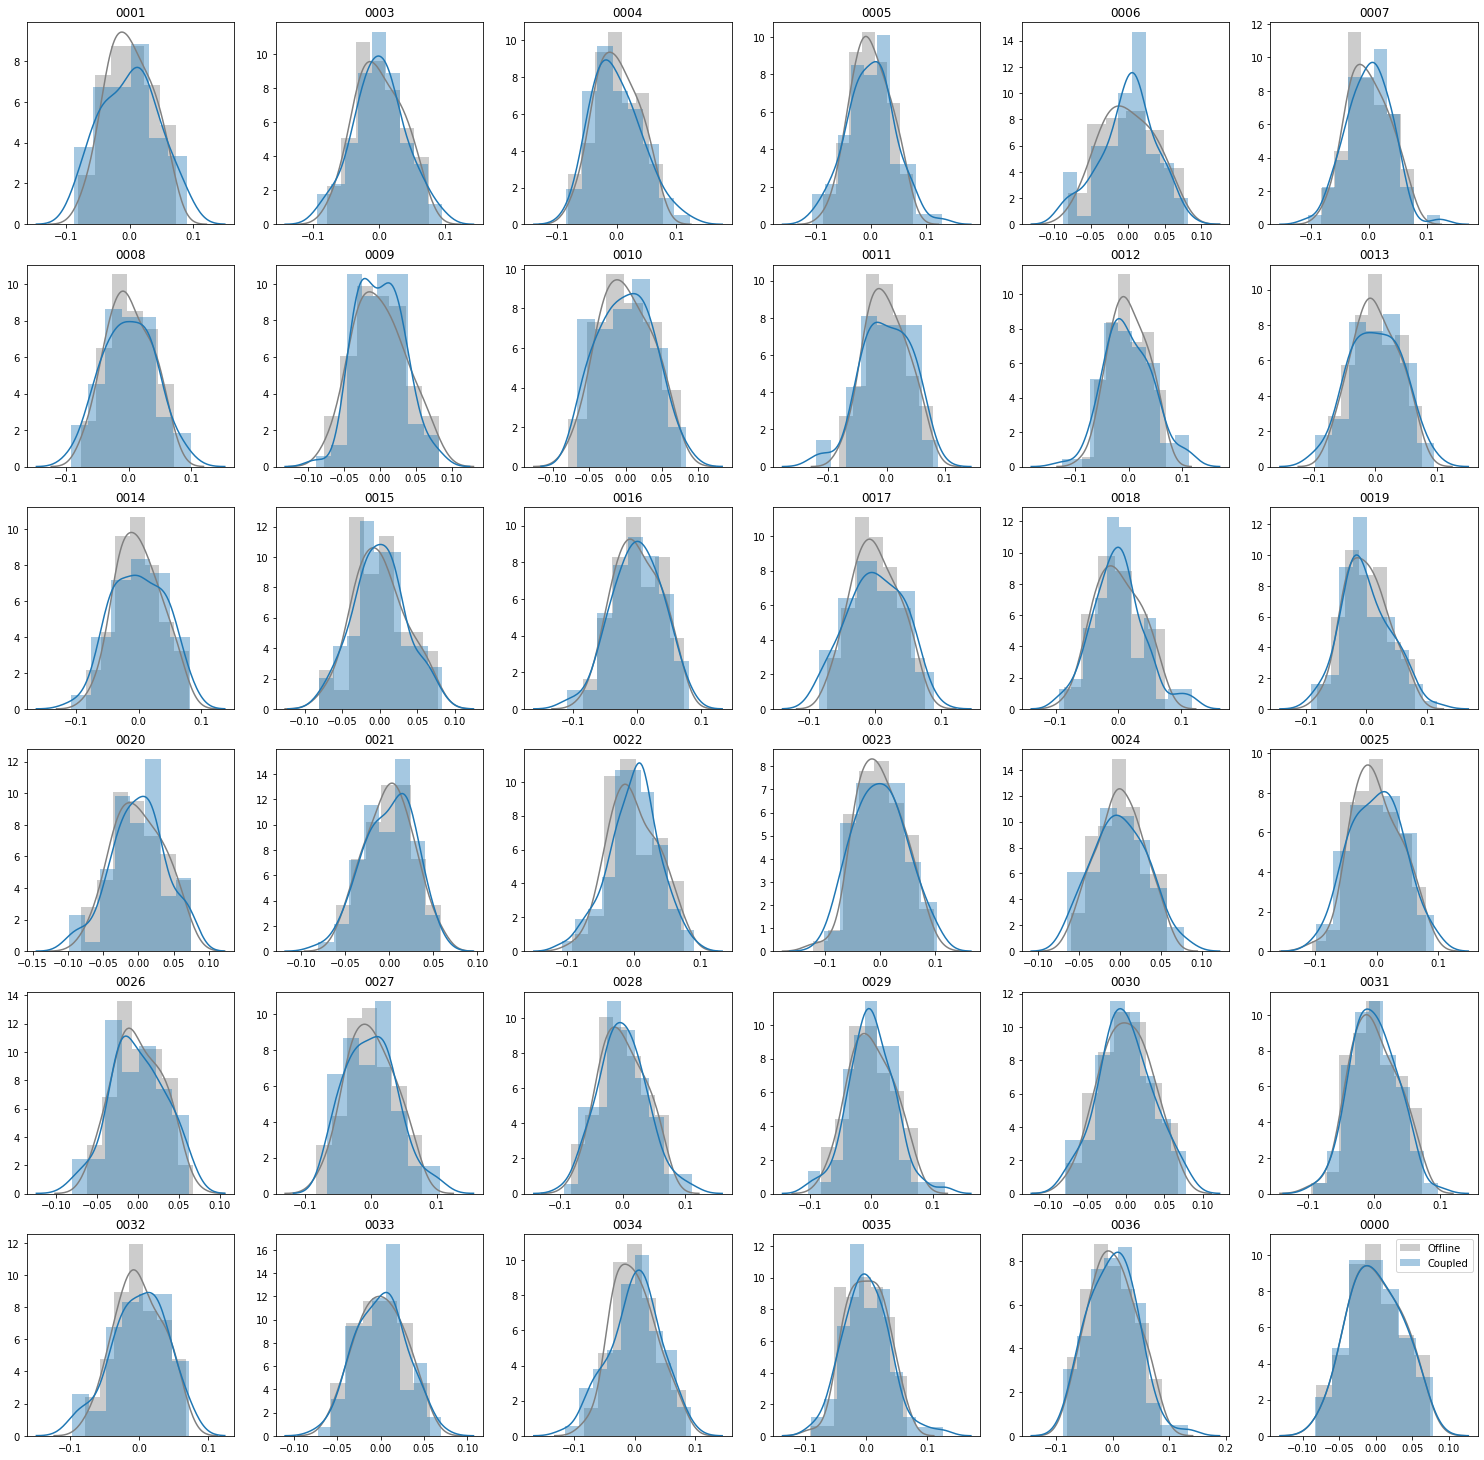

In [82]:
plt.figure(figsize=(26,26))
for i, ds in enumerate(ensemble_coupled):
    key=keys[i]
    ds_offline=ensemble_offline[i]
    ds_annual_global_coupled=calculate_mean(ds[var])
    ds_annual_global_offline=calculate_mean(ds_offline[var])
    ds_annual_global_coupled=ds_annual_global_coupled-np.nanmean(ds_annual_global_coupled)
    ds_annual_global_offline=ds_annual_global_offline-np.nanmean(ds_annual_global_offline)
    plt.subplot(6,6,i+1)
    sns.distplot(ds_annual_global_offline*86400, color='gray',label='Offline')
    sns.distplot(ds_annual_global_coupled*86400, label='Coupled')
    plt.title(key)
plt.legend()

In [ ]:
plt.figure(figsize=(26,26))
for i, ds in enumerate(ensemble_coupled):
    key=keys[i]
    ds_offline=ensemble_offline[i]
    ds_annual_global_coupled=calculate_mean(ds[var])
    ds_annual_global_offline=calculate_mean(ds_offline[var])
    ds_annual_global_coupled=ds_annual_global_coupled-np.nanmean(ds_annual_global_coupled)
    ds_annual_global_offline=ds_annual_global_offline-np.nanmean(ds_annual_global_offline)
    plt.subplot(6,6,i+1)
    plt.plot(ds_annual_global_coupled*unitconv,'.--r', label='Coupled')
    plt.plot(ds_annual_global_offline*unitconv,'.-k', label='Offline')
    
    std_diff=(global_iav_coupled[i]*unitconv-global_iav_offline[i]*unitconv)

    plt.title(key+',   '+str(np.round(std_diff,3)))
plt.legend()

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3

# Make plots of changes for each point

In [194]:
ref_flat=basecase_lnd_coupled[var].mean(dim='time').stack(gridcell=['lat', 'lon']).load()

0


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3

1


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3

2


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3

3


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3

4


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2ac58da072f0> (for post_execute):


KeyboardInterrupt: 

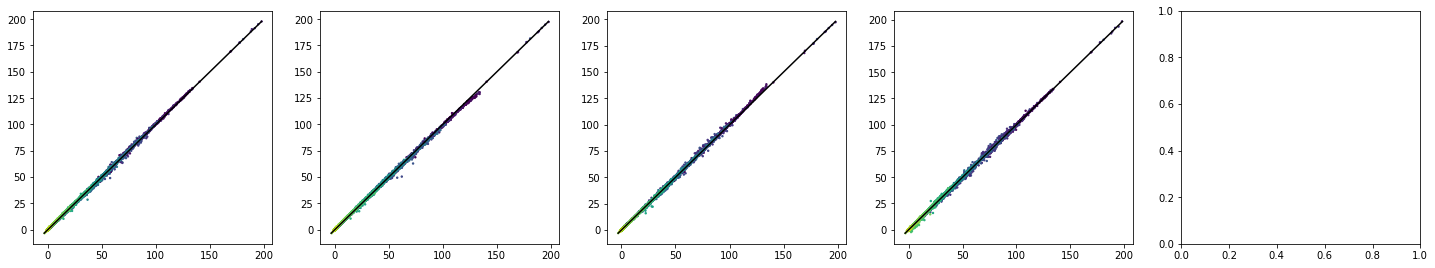

In [136]:
plt.figure(figsize=(30,30))
for i, ds in enumerate(ensemble_coupled):
    plt.subplot(6,6,i+1)
    print(i)
    ds_flat=ds[var].mean(dim='time').stack(gridcell=['lat', 'lon'])
    minval=np.nanmin([np.nanmin(ref_flat),np.nanmin(ds_flat)])
    maxval=np.nanmax([np.nanmax(ref_flat),np.nanmax(ds_flat)])
    plt.scatter(ref_flat, ds_flat,c=np.abs(ds_flat.lat),s=2)
    plt.plot([minval, maxval],[minval, maxval],'-k')

0


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


1


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


2


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


3


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


4


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


5


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


6


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


7


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


8


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


9


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


10


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


11


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


12


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


13


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


14


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


15


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


16


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


17


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


18


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


19


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


20


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


21


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


22


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


23


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


24


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


25


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


26


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


27


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


28


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


29


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


30


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


31


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


32


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


33


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


34


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


35


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


TypeError: 'NoneType' object is not subscriptable

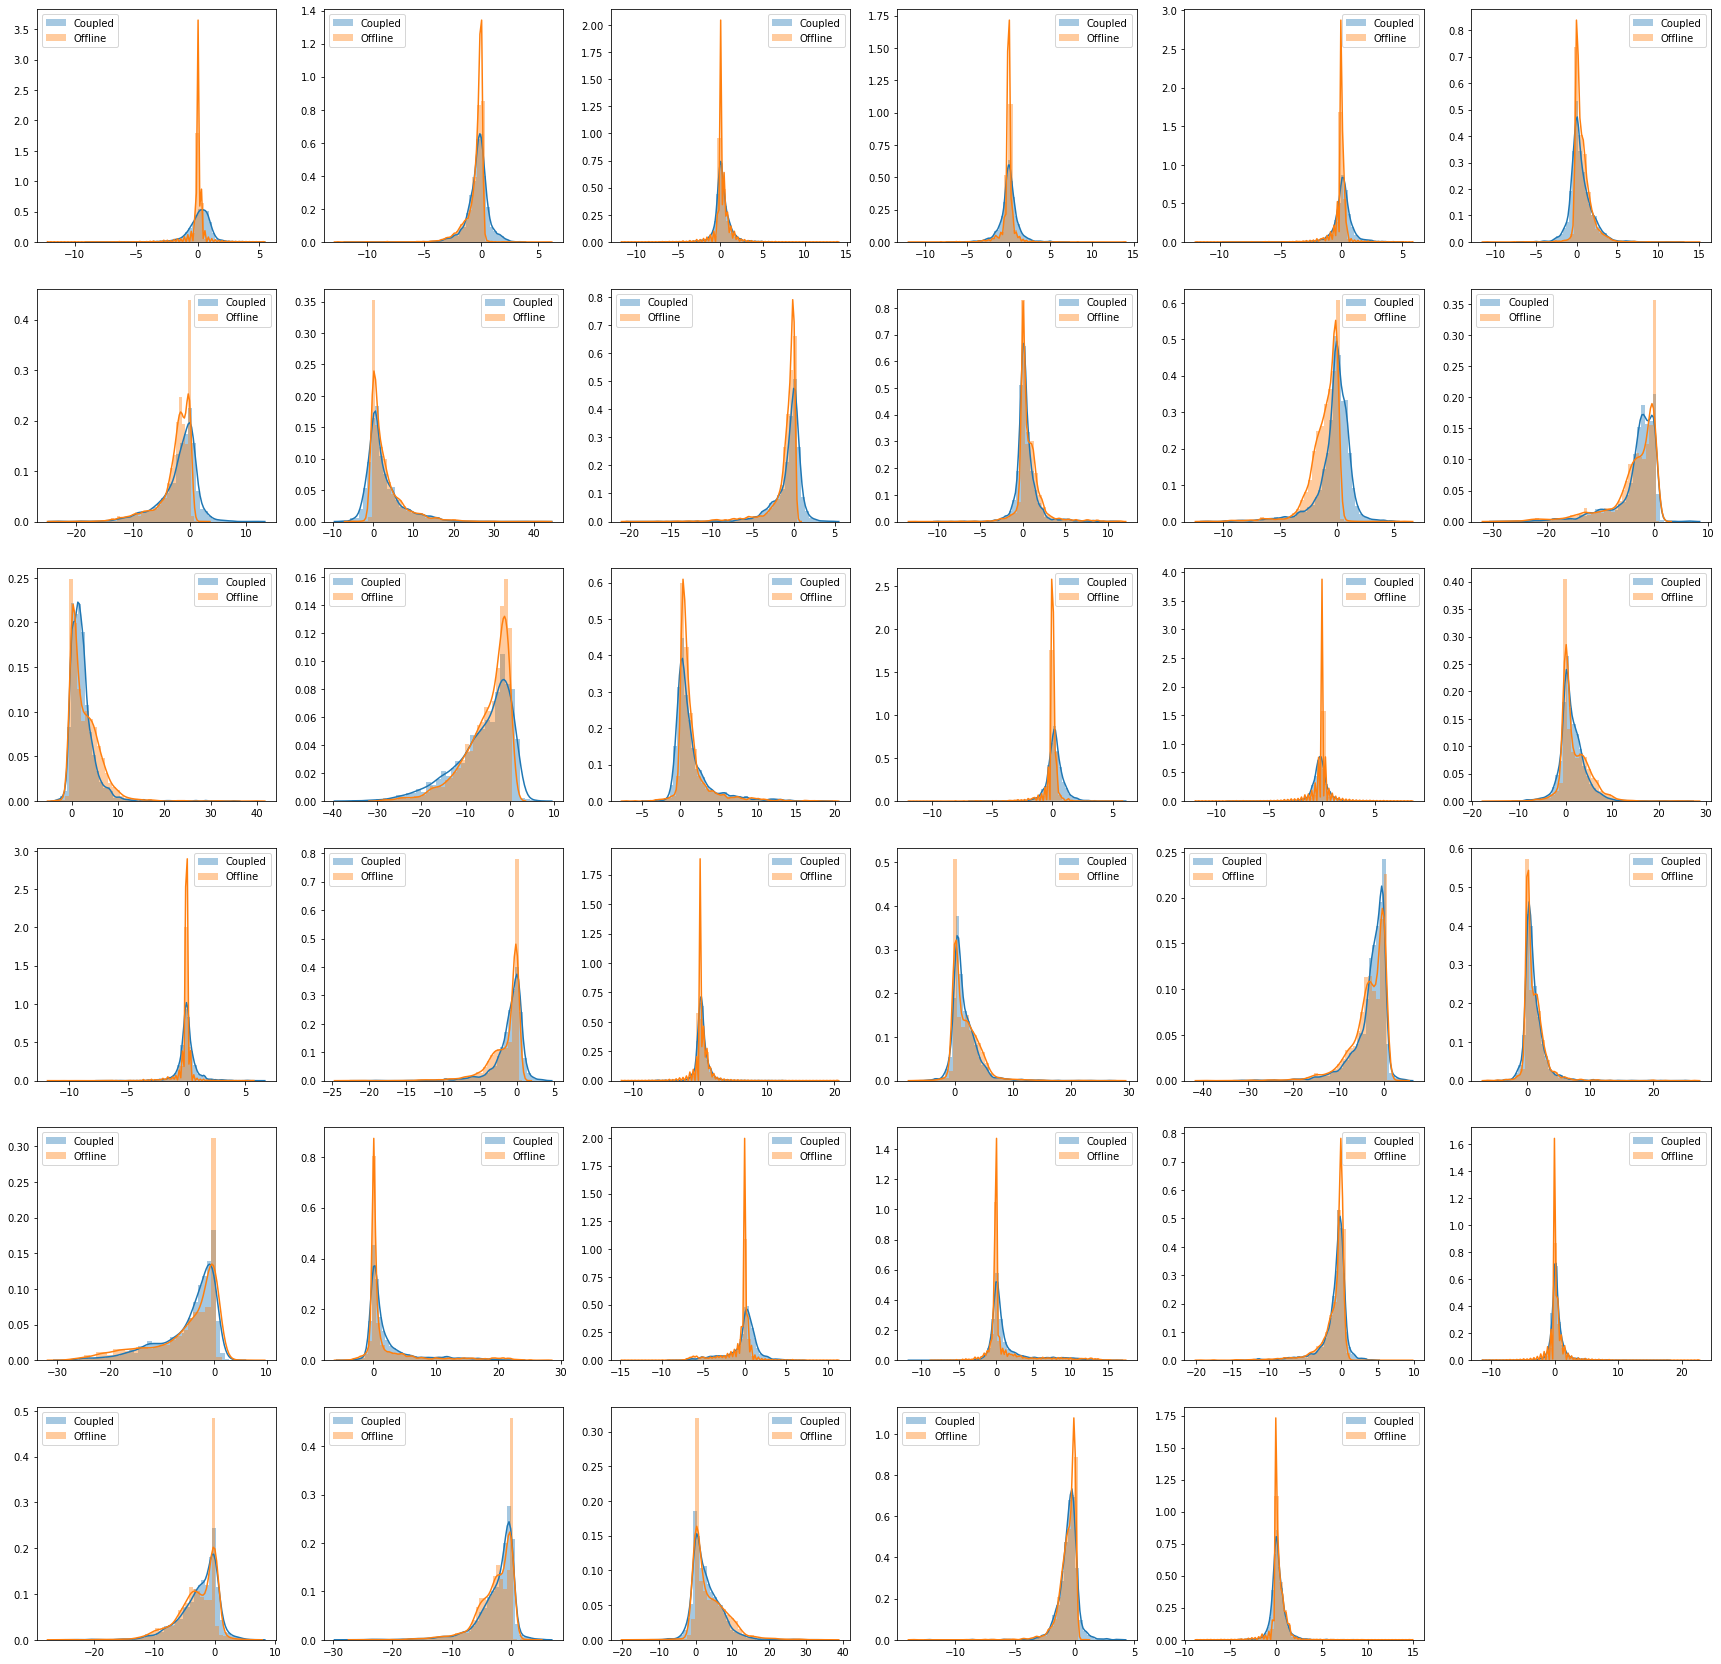

In [144]:
plt.figure(figsize=(30,30))
point_filter=(np.abs(ref_flat.lat)<60)&(~np.isnan(ref_flat))
for i, ds in enumerate(ensemble_coupled):
    print(i)
    ds_flat=ds[var].mean(dim='time').stack(gridcell=['lat', 'lon'])
    ds_offline=ensemble_offline[i]
    ds_flat_offline=ds_offline[var].mean(dim='time').stack(gridcell=['lat', 'lon'])
    delta_coupled=ds_flat-ref_flat
    delta_offline=ds_flat_offline-ref_flat
    plt.subplot(6,6,i+1)
    sns.distplot(delta_coupled.values[point_filter], label='Coupled')
    sns.distplot(delta_offline.values[point_filter], label='Offline')
    plt.legend()

0


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


1


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


2


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


3


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


4


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


5


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


6


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


7


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


8


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


9


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


10


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


11


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


12


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


13


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


14


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


15


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


16


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


17


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


18


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


19


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


20


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


21


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


22


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


23


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


24


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


25


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


26


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


27


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


28


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


29


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


30


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


31


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


32


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


33


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


34


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


35


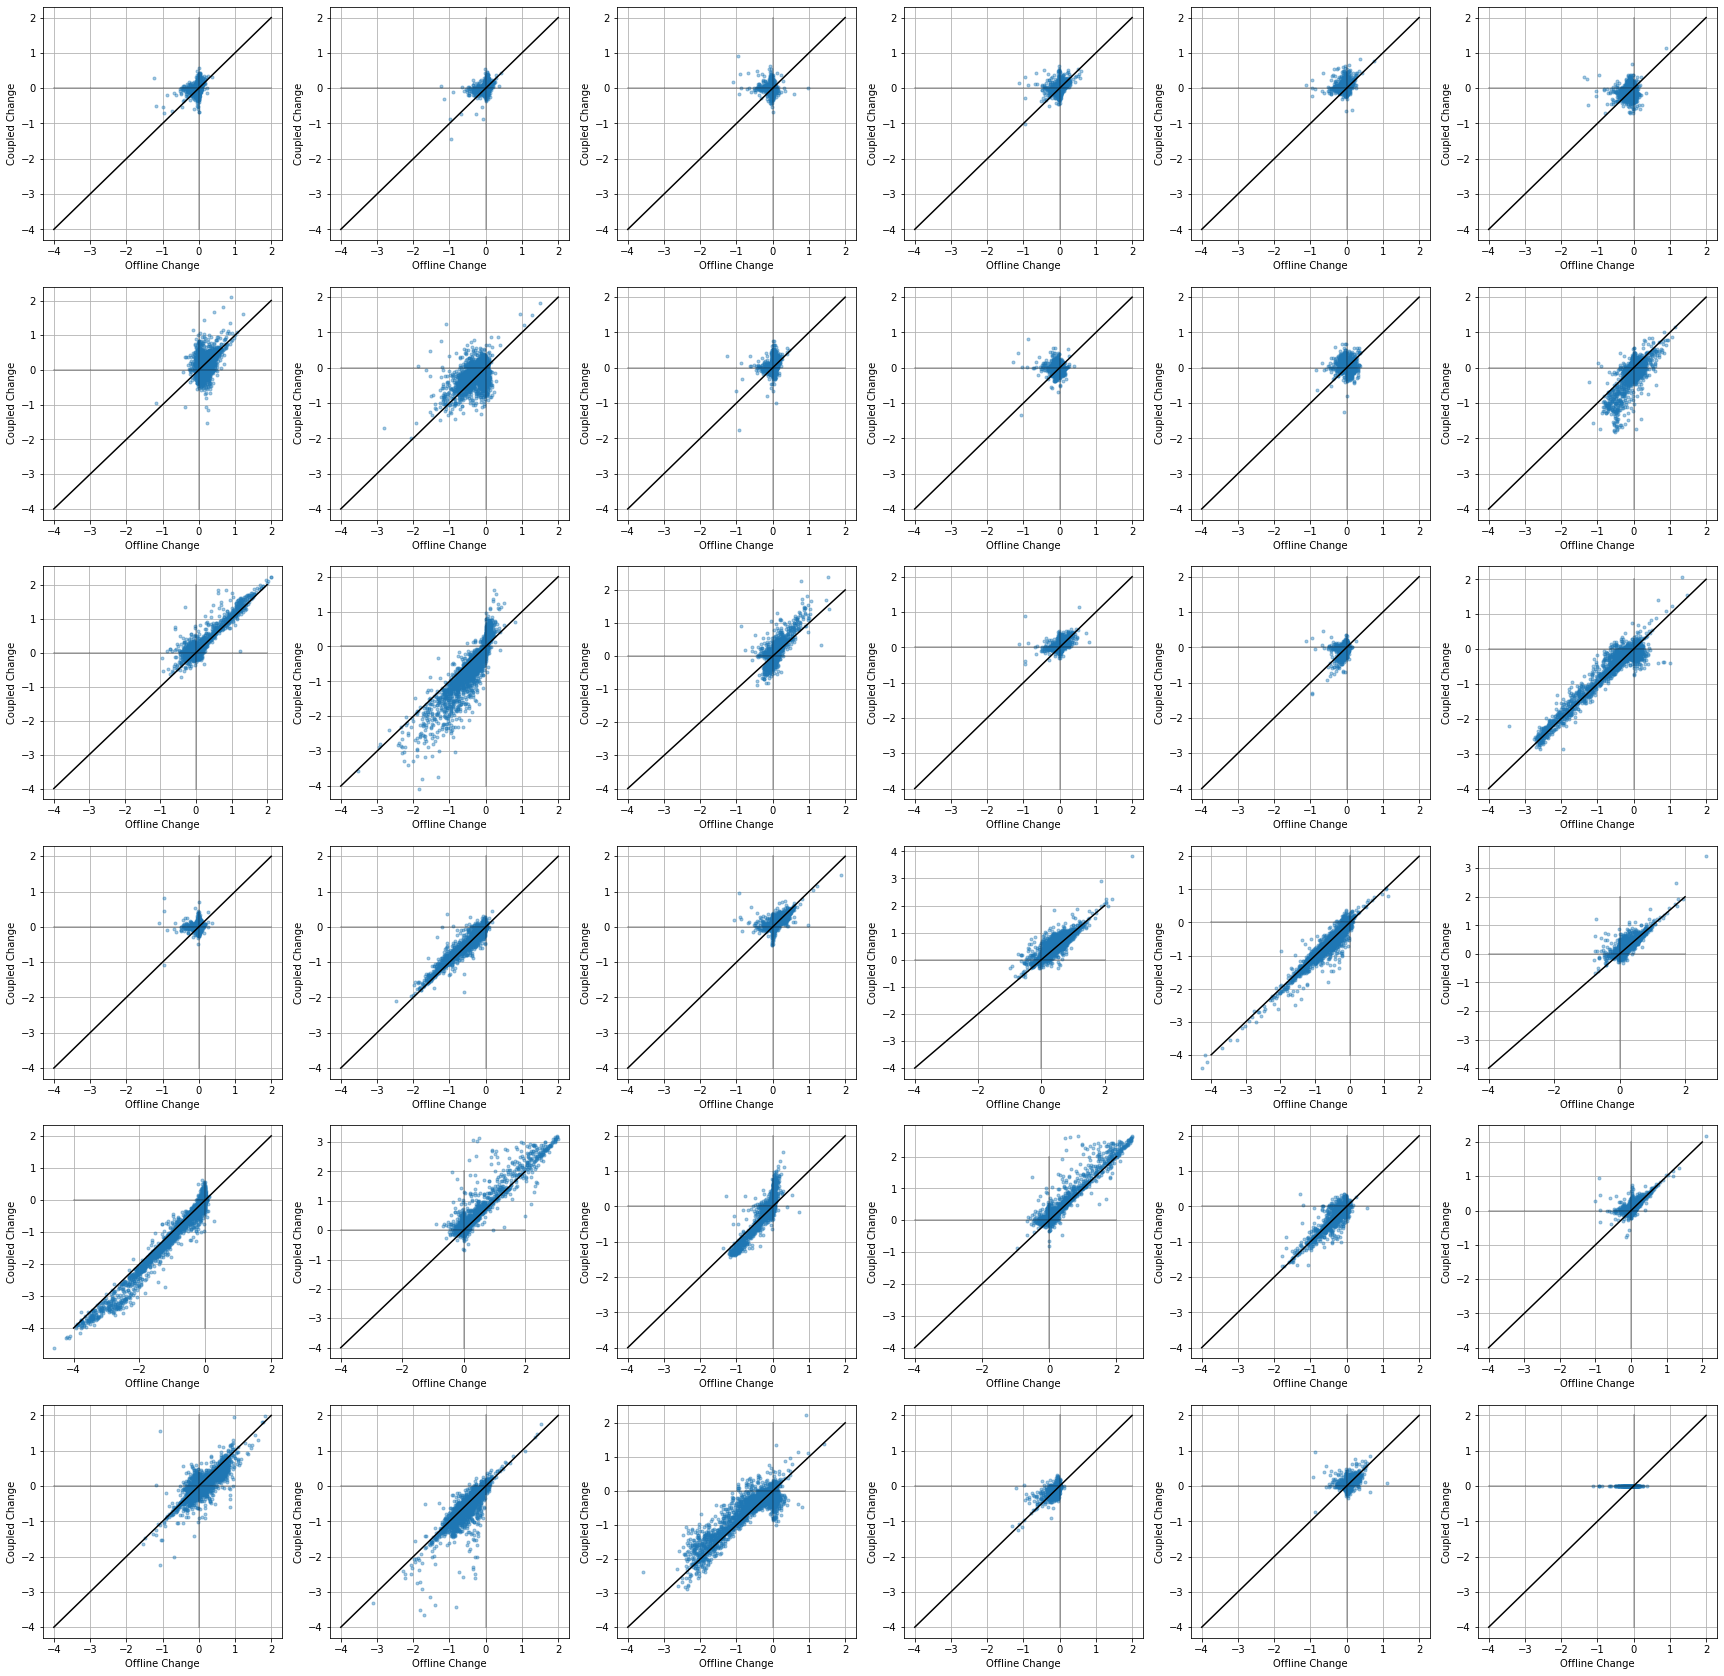

In [199]:
unitconv=86400
plt.figure(figsize=(30,30))
point_filter=(np.abs(ref_flat.lat)<60)&(~np.isnan(ref_flat))
for i, ds in enumerate(ensemble_coupled):
    print(i)
    ds_flat=ds[var].mean(dim='time').stack(gridcell=['lat', 'lon'])
    ds_offline=ensemble_offline[i]
    ds_flat_offline=ds_offline[var].mean(dim='time').stack(gridcell=['lat', 'lon'])
    delta_coupled=(ds_flat-ref_flat)*unitconv
    delta_offline=(ds_flat_offline-ref_flat)*unitconv
    plt.subplot(6,6,i+1)
    minval=-4#np.nanmin([np.nanmin(delta_offline), np.nanmin(delta_coupled)])
    maxval=2#np.nanmax([np.nanmax(delta_offline), np.nanmax(delta_coupled)])
    plt.plot(delta_offline, delta_coupled, '.', alpha=0.4)
    plt.plot([minval,maxval],[minval,maxval],'-k')
    plt.plot([minval,maxval],[0,0],'-k',alpha=0.3)
    plt.plot([0,0],[minval,maxval],'-k',alpha=0.3)
    plt.grid()
    plt.xlabel('Offline Change')
    plt.ylabel('Coupled Change')
plt.savefig('example.png')